In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [60]:
# Read in the data

url = 'https://raw.githubusercontent.com/vtnrwyers/phys421/master/JupyterNotebooks/airdensity'
df = pd.read_csv(url)
df.head(100)

,Altitude,Density
0,-1000,1.821
1,0,1.789
2,1000,1.758
3,2000,1.726
4,3000,1.694
5,4000,1.661
6,5000,1.628
7,6000,1.595
8,7000,1.561
9,8000,1.527


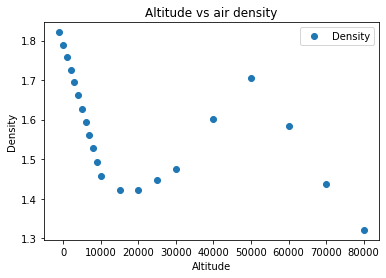

In [61]:
# plot the data

df.plot('Altitude','Density',style='o')
plt.ylabel('Density')
plt.title('Altitude vs air density')
plt.show()

In [62]:
result = sm.ols('Altitude ~ Density',df,).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:               Altitude   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     7.067
Date:                Wed, 16 Sep 2020   Prob (F-statistic):             0.0155
Time:                        22:27:24   Log-Likelihood:                -238.32
No. Observations:                  21   AIC:                             480.6
Df Residuals:                      19   BIC:                             482.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.673e+05   5.52e+04      3.032      0.0

In [63]:
# Extract information from the result object and plot along with the data.

yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

print (yint,slope,r2)

167272.73600321624 -92638.03224257508 0.2711089487100937


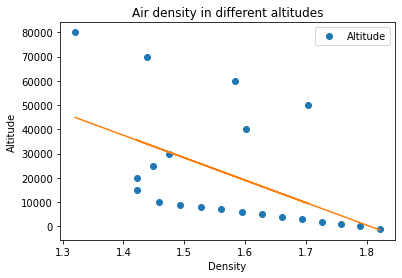

In [64]:
yfit = yint + slope*df['Density']
x = df['Density']

df.plot('Density','Altitude',style='o')
plt.ylabel('Altitude')
plt.title('Air density in different altitudes')
plt.plot(x,yfit)
plt.show()

Coefficients (from curve_fit)
[167272.732628   -92638.03010288]
Covariance Matrix (from curve_fit)
[[ 3.04383639e+09 -1.91555009e+09]
 [-1.91555009e+09  1.21434981e+09]]


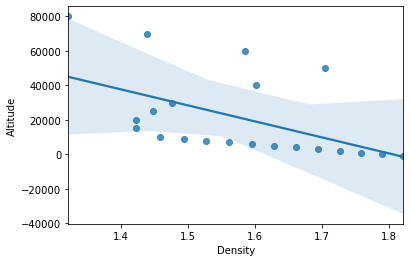

In [65]:
import seaborn as sns
sns.regplot('Density', 'Altitude', df, ci=99.99)

# Let's do a linear fit using the curve_fit utility from scipy, for comparision with seaborn regplot.

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
x = np.array(df['Density'])
y = np.array(df['Altitude'])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(2.5,5,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

#plt.plot(xi,lower)
#plt.plot(xi,upper)
plt.show()

In [73]:
result = sm.ols('Altitude ~ Density',df[:-8],).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:               Altitude   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     246.9
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           6.98e-09
Time:                        23:03:58   Log-Likelihood:                -106.82
No. Observations:                  13   AIC:                             217.6
Df Residuals:                      11   BIC:                             218.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.09e+04   3548.024     17.164      0.0

C:\Users\vtnrw\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


60897.994092911766 -34196.46634211199 0.9573506017247102
Coefficients (from curve_fit)
[ 60897.99411825 -34196.4663577 ]
Covariance Matrix (from curve_fit)
[[12588474.71262178 -7698913.94080271]
 [-7698913.94080271  4735999.7005571 ]]


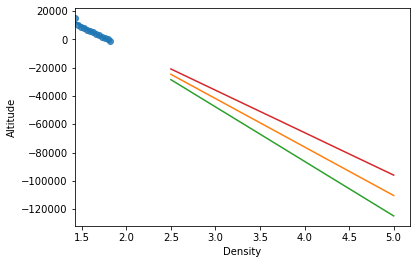

In [74]:
# Extract information from the result object and plot along with the data.

yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

print (yint,slope,r2)

import seaborn as sns
sns.regplot('Density', 'Altitude', df[:-8], ci=95)

# Let's do a linear fit using the curve_fit utility from scipy, for comparision with seaborn regplot.

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
x = np.array(df['Density'][:-8])
y = np.array(df['Altitude'][:-8])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(2.5,5.0,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

In [68]:
N_model = 2
v_model = N_model - 1

print (df['Density'][:-1])

N = len(df['Density'][:-1])
v_total = N - 1
v_error = v_total - v_model

print ("v_total, v_model, v_error = ", v_total,v_model,v_error)

0     1.821
1     1.789
2     1.758
3     1.726
4     1.694
5     1.661
6     1.628
7     1.595
8     1.561
9     1.527
10    1.493
11    1.458
12    1.422
13    1.422
14    1.448
15    1.475
16    1.601
17    1.704
18    1.584
19    1.438
Name: Density, dtype: float64
v_total, v_model, v_error =  19 1 18


In [69]:
SS_total = (N-1)*df['Altitude'][:-1].var()

SS_model = r2*SS_total

SS_error = SS_total - SS_model

print (SS_total, SS_model, SS_error)

8511200000.0 1233786011.6364503 7277413988.36355


In [70]:
# Proceed with normal ANOVA from here
MS_model = SS_model/v_model
MS_error = SS_error/v_error

fSN = MS_model/MS_error

print ("F Signal/Noise = %0.2f " % fSN)

alpha = 0.05

fdist = stats.f(v_model,v_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.2f" % (fhigh))

pvalue = (1-fdist.cdf(fSN))
    
print ("Pvalue = %0.3f" % (pvalue))

# print table

print ("Source     df     Sum of Squares Mean Square     f     P-value")
print ("Model      %0.0f       %0.2f           %0.2f        %0.2f    %0.3f" %(v_model,SS_model,MS_model,fSN,pvalue))
print ("Error      %0.0f       %0.2f           %0.2f" %(v_error,SS_error,MS_error))
print ("Total      %0.0f       %0.2f" %(v_total,SS_total))

F Signal/Noise = 3.05 
Critical F-value = 4.41
Pvalue = 0.098
Source     df     Sum of Squares Mean Square     f     P-value
Model      1       1233786011.64           1233786011.64        3.05    0.098
Error      18       7277413988.36           404300777.13
Total      19       8511200000.00


In [71]:
# Let's go back and look at the full data set (with Northern Ireland included)

result = sm.ols('Altitude ~ Density',df,).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:               Altitude   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     7.067
Date:                Wed, 16 Sep 2020   Prob (F-statistic):             0.0155
Time:                        22:27:30   Log-Likelihood:                -238.32
No. Observations:                  21   AIC:                             480.6
Df Residuals:                      19   BIC:                             482.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.673e+05   5.52e+04      3.032      0.0

In [72]:
# Extract information from the result object and plot along with the data.

yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

N_model = 2
v_model = N_model - 1

N = len(df['Density'])
v_total = N - 1
v_error = v_total - v_model

print ("v_total, v_model, v_error = ", v_total,v_model,v_error)

SS_total = (N-1)*df['Altitude'].var()

SS_model = r2*SS_total

SS_error = SS_total - SS_model

print (SS_total, SS_model, SS_error)

# Proceed with normal ANOVA from here
MS_model = SS_model/v_model
MS_error = SS_error/v_error

fSN = MS_model/MS_error

print ("F Signal/Noise = %0.2f " % fSN)

alpha = 0.05

fdist = stats.f(v_model,v_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.2f" % (fhigh))

pvalue = 1-fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

# print table

print ("Source     df     Sum of Squares Mean Square     f     P-value")
print ("Model      %0.0f       %0.2f           %0.2f        %0.2f    %0.3f" %(v_model,SS_model,MS_model,fSN,pvalue))
print ("Error      %0.0f       %0.2f           %0.2f" %(v_error,SS_error,MS_error))
print ("Total      %0.0f       %0.2f" %(v_total,SS_total))

v_total, v_model, v_error =  20 1 19
12148571428.571426 3293586428.3294806 8854985000.241945
F Signal/Noise = 7.07 
Critical F-value = 4.38
Pvalue = 0.016
Source     df     Sum of Squares Mean Square     f     P-value
Model      1       3293586428.33           3293586428.33        7.07    0.016
Error      19       8854985000.24           466051842.12
Total      20       12148571428.57
